In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import os
import datetime
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 500)
from __future__ import print_function
import math
import csv
import glob

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# visualization
from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
%matplotlib inline

#sentiment analysis
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords


# technical analaysis  
import talib

# machine learning
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
tf.logging.set_verbosity(tf.logging.ERROR)
from sklearn.preprocessing import MinMaxScaler

In [3]:
tweet_df = pd.read_csv('data/processed_tweet_data_1030-rows.csv')

In [4]:
tweet_df = tweet_df.drop(columns='Unnamed: 0')

In [5]:
price_df = pd.read_csv('data/processed_btc_price_data_2014-12-01_to_2018-11-11.csv')

In [6]:
price_df = price_df.drop(columns='Unnamed: 0')

In [7]:
price_tweet_df = (price_df.merge(tweet_df, on='date'))

In [8]:
price_tweet_df.describe()

,Close,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader,pos-neg_textBlob,pos-neg_vader,neg-plus-neu_textBlob,posNeg-plusNeu_textBlob,neg-plus-neu_vader,posNeg-plusNeu_vader,signal_textBlob,signal_vader
count,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0
mean,4009.0,170184.7,262.9,216.8,377.2,684.9,114.2,556.6,466.8,152.9,262.9,403.6,799.1,-422.0,619.7,-63.2,-0.9,-0.3
std,4106.9,185830.5,277.3,232.0,398.6,725.9,128.4,590.5,494.9,170.1,277.3,430.0,850.3,461.4,660.4,136.1,0.4,0.9
min,199.8,5338.0,3.0,-2.0,14.0,18.0,0.0,16.0,13.0,1.0,3.0,9.0,21.0,-1303.0,19.0,-622.0,-1.0,-1.0
25%,516.5,15028.8,34.0,26.3,43.0,70.0,8.0,63.0,48.0,11.0,34.0,49.0,78.0,-934.2,60.0,-98.2,-1.0,-1.0
50%,2342.8,33416.0,70.0,56.3,87.5,167.0,24.0,131.0,114.0,33.0,70.0,104.5,190.0,-106.0,147.0,-15.5,-1.0,-1.0
75%,6705.8,401183.2,566.0,472.1,844.0,1556.2,249.0,1254.0,1052.5,333.0,566.0,887.2,1844.0,-34.0,1404.2,9.0,-1.0,1.0
max,19419.9,448986.0,903.0,736.3,1108.0,1801.0,465.0,1599.0,1301.0,614.0,903.0,1324.0,2048.0,35.0,1699.0,487.0,1.0,1.0


In [10]:
price_tweet_df.head()

,date,Close,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader,pos-neg_textBlob,pos-neg_vader,neg-plus-neu_textBlob,posNeg-plusNeu_textBlob,neg-plus-neu_vader,posNeg-plusNeu_vader,signal_textBlob,signal_vader
0,2014-12-08,375.0,16414.0,28.0,34.1,56.0,58.0,28.0,78.0,41.0,23.0,28.0,55.0,86.0,-30.0,64.0,14.0,-1,1
1,2014-12-18,340.0,9518.0,28.0,23.1,31.0,44.0,3.0,47.0,20.0,11.0,28.0,36.0,47.0,-16.0,31.0,16.0,-1,1
2,2015-01-12,260.0,13965.0,26.0,32.9,34.0,77.0,8.0,69.0,42.0,8.0,26.0,61.0,85.0,-51.0,50.0,19.0,-1,1
3,2015-01-15,207.6,13759.0,30.0,34.3,40.0,68.0,10.0,70.0,40.0,8.0,30.0,62.0,78.0,-38.0,48.0,22.0,-1,1
4,2015-01-16,203.0,9236.0,9.0,15.6,20.0,45.0,11.0,37.0,28.0,11.0,9.0,26.0,56.0,-36.0,39.0,-2.0,-1,-1


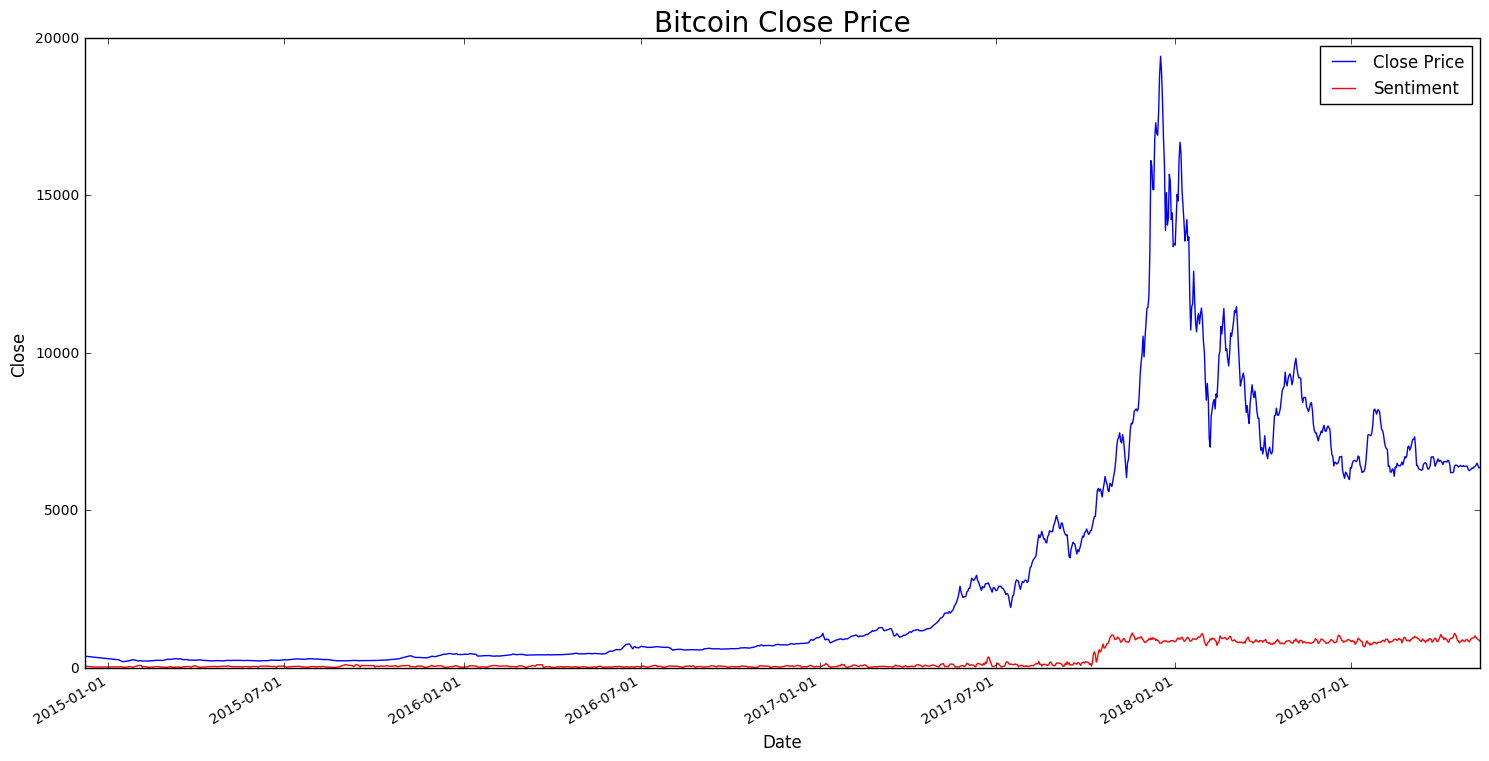

In [9]:
#preproces date col
dates_list_actual = list(price_tweet_df['date'])
dates_list_formatted_actual = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list_actual]

# price visualization
plt.figure(figsize = (18,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(dates_list_formatted_actual, price_tweet_df['Close'], color='b', label='Close Price')
plt.plot(dates_list_formatted_actual, price_tweet_df['pos_tweet_textBlob'], color='r', label='Sentiment')


plt.xlabel('Date',fontsize=12)
plt.ylabel('Close',fontsize=12)
plt.gcf().autofmt_xdate()
plt.title('Bitcoin Close Price',fontsize=20)
plt.ylim(-1,20000)
plt.legend()

## Train and Test Split

In [26]:
train_df = price_tweet_df[:800]
test_df = price_tweet_df[800:]

In [28]:
train_df.describe()

,Close,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader,pos-neg_textBlob,pos-neg_vader,neg-plus-neu_textBlob,posNeg-plusNeu_textBlob,neg-plus-neu_vader,posNeg-plusNeu_vader,signal_textBlob,signal_vader
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,3185.6,105167.9,175.1,136.4,247.1,446.2,72.0,360.1,302.0,103.3,175.1,256.8,518.3,-271.1,405.3,-45.2,-0.9,-0.2
std,4226.2,153101.1,241.3,189.7,345.0,626.1,108.0,504.4,422.0,155.3,241.3,356.7,732.0,394.1,574.6,120.8,0.4,1.0
min,199.8,5338.0,3.0,-2.0,14.0,18.0,0.0,16.0,13.0,1.0,3.0,9.0,21.0,-1303.0,19.0,-622.0,-1.0,-1.0
25%,422.6,13564.5,30.0,23.1,39.0,61.0,6.0,55.0,44.0,10.0,30.0,43.0,70.0,-263.5,54.0,-41.0,-1.0,-1.0
50%,916.4,21321.0,49.0,38.6,61.0,103.5,14.0,89.0,71.0,20.0,49.0,71.0,117.5,-63.0,90.5,-9.0,-1.0,-1.0
75%,4359.6,75386.5,124.2,97.5,171.2,369.5,51.0,253.5,253.8,77.2,124.2,187.5,409.0,-28.0,328.2,11.0,-1.0,1.0
max,19419.9,424802.0,903.0,723.5,1108.0,1774.0,432.0,1596.0,1275.0,614.0,903.0,1324.0,2048.0,35.0,1699.0,487.0,1.0,1.0


In [31]:
#test_df.describe()
test_df.head()

,date,Close,tweet_len,sentiment_score_textBlob,sentiment_score_vader,pos_tweet_textBlob,neu_tweet_textBlob,neg_tweet_textBlob,pos_tweet_vader,neu_tweet_vader,neg_tweet_vader,pos-neg_textBlob,pos-neg_vader,neg-plus-neu_textBlob,posNeg-plusNeu_textBlob,neg-plus-neu_vader,posNeg-plusNeu_vader,signal_textBlob,signal_vader
800,2018-04-13,8009.6,397217.0,514.0,601.3,777.0,1736.0,263.0,1403.0,1058.0,315.0,514.0,1088.0,1999.0,-1222.0,1373.0,30.0,-1,1
801,2018-04-14,8023.4,394546.0,569.0,588.3,832.0,1632.0,263.0,1386.0,1011.0,330.0,569.0,1056.0,1895.0,-1063.0,1341.0,45.0,-1,1
802,2018-04-15,8248.1,406408.0,592.0,585.5,846.0,1646.0,254.0,1396.0,1016.0,334.0,592.0,1062.0,1900.0,-1054.0,1350.0,46.0,-1,1
803,2018-04-16,8033.2,405933.0,679.0,598.8,904.0,1632.0,225.0,1405.0,1026.0,330.0,679.0,1075.0,1857.0,-953.0,1356.0,49.0,-1,1
804,2018-04-17,8020.1,409546.0,653.0,597.3,870.0,1706.0,217.0,1386.0,1097.0,310.0,653.0,1076.0,1923.0,-1053.0,1407.0,-21.0,-1,-1


In [32]:
def preprocess_features(price_tweet_df):
    """Prepares input features from price_tweet_dfdata set.

  Args:
    price_tweet_df: A Pandas DataFrame expected to contain feature data
  Returns:
    A DataFrame that contains the features to be used for the model.
  """
    selected_features = price_tweet_df[["pos_tweet_textBlob"]]
    processed_features = selected_features.copy()
    
    return processed_features

def preprocess_targets(price_tweet_df):
    """Prepares target features (i.e., labels) from price_tweet_df data set.

  Args:
    price_tweet_df: A Pandas DataFrame expected to contain target data
     
  Returns:
    A DataFrame that contains the target feature.
  """
    output_targets = pd.DataFrame()
    output_targets["Close"] = (price_tweet_df["Close"] / 100.0)
    
    return output_targets

In [34]:
# training validation split
training_features = preprocess_features(train_df.head(600))
training_targets = preprocess_targets(train_df.head(600))

validation_features = preprocess_features(train_df.head(200))
validation_targets = preprocess_targets(train_df.head(200))

print("Training features summary:")
display.display(training_features.describe())
print("Training targets summary:")
display.display(training_targets.describe())

print("Validation features summary:")
display.display(validation_features.describe())

print("Validation targets summary:")
display.display(validation_targets.describe())

Training features summary:


,pos_tweet_textBlob
count,600.0
mean,59.3
std,38.6
min,14.0
25%,35.0
50%,48.0
75%,71.0
max,350.0


Training targets summary:


,Close
count,600.0
mean,10.6
std,11.0
min,2.0
25%,3.6
50%,6.2
75%,11.8
max,48.4


Validation features summary:


,pos_tweet_textBlob
count,200.0
mean,45.4
std,18.5
min,17.0
25%,31.0
50%,43.0
75%,56.0
max,107.0


Validation targets summary:


,Close
count,200.0
mean,2.9
std,0.7
min,2.0
25%,2.4
50%,2.6
75%,3.6
max,4.6


In [35]:
def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.
    Args:
    input_features: The names of the numerical input features to use.
    Returns:
    A set of feature columns
    """ 
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [36]:
def my_input_fn(features, targets, batch_size=1, shuffle=False, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
            
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

## Train the model

In [50]:
def train_nn_regression_model(
    my_optimizer, 
    steps, 
    batch_size, 
    hidden_units, 
    training_features,
    training_targets,
    validation_features,
    validation_targets):
    """Trains a neural network regression model.
    Args:
        learning_rate: A `float`, the learning rate.
        steps: A non-zero `int`, the total number of training steps. A training step
          consists of a forward and backward pass using a single batch.
        batch_size: A non-zero `int`, the batch size.
        input_feature: A `string` specifying a column from `price_tweet_df`
          to use as input feature.
    Returns:
        A tuple (estimator, training_losses):
        estimator: the trained DNNRegressor object.
        training_losses: a list containg the training loss values taken during training.
        
  """
    periods = 10
    steps_per_period = steps / periods
    
    # Create a DNNRegressor object.
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    
    dnn_regressor = tf.estimator.DNNRegressor(
        feature_columns=construct_feature_columns(training_features),
        hidden_units=hidden_units,
        optimizer=my_optimizer
    )
    
    # Create input functions.
    training_input_fn = lambda:my_input_fn(training_features, 
                                           training_targets["Close"], 
                                           batch_size=batch_size)
    
    prediction_training_input_fn = lambda: my_input_fn(training_features, 
                                                       training_targets["Close"], 
                                                       num_epochs=1, 
                                                       shuffle=False)
    
    prediction_validation_input_fn = lambda: my_input_fn(validation_features, 
                                                       validation_targets["Close"], 
                                                       num_epochs=1, 
                                                       shuffle=False)
   
    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    
    for period in range(0, periods):
        # Train the model, starting from the prior state.
        dnn_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        
        # Take a break and compute predictions.
        training_predictions = dnn_regressor.predict(input_fn=prediction_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        
        validation_predictions = dnn_regressor.predict(input_fn=prediction_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
        
        # Compute loss.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        
        # add the loss metrics from this period to our list
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")
    
    # Output a graph of loss metrics over periods.
    plt.subplot(1, 2, 2)
    plt.ylabel('RMSE')
    plt.xlabel('Periods')
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    
    
#     # Output a table with calibration data.
#     calibration_data_final = pd.DataFrame()
#     calibration_data_final["predictions"] = pd.Series(predictions)
#     calibration_data_final["targets"] = pd.Series(targets)
#     display.display(calibration_data_final.describe())
    
    #preproces date col
#     dates_list_actual = list(price_tweet_df['date'])
#     dates_list_formatted_actual = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list_actual]

    
#     price_tweet_df_training = train_df['date']
#     dates_list_training = list(price_tweet_df_training)
#     dates_list_formatted_training = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list_training]

#     # price visualization
#     plt.figure(figsize = (18,9))
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
   
#     plt.plot(dates_list_formatted_actual, price_tweet_df['Close'], color='b', label='Actual')
#     plt.plot(dates_list_formatted_training, training_predictions, color='red', label='Training')

#     plt.xlabel('Date',fontsize=12)
#     plt.ylabel('Close',fontsize=12)
#     plt.gcf().autofmt_xdate()
#     plt.title('Bitcoin Close Price',fontsize=20)
#     plt.ylim(-1,20000)
    plt.legend()
    
    print("Final RMSE (on training data): %0.2f" % training_root_mean_squared_error)
    print("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)
    
    return dnn_regressor

Training model...
RMSE (on training data):
  period 00 : 42.54
  period 01 : 51.34
  period 02 : 45.72
  period 03 : 45.74
  period 04 : 45.77
  period 05 : 45.79
  period 06 : 45.82
  period 07 : 45.86
  period 08 : 45.90
  period 09 : 45.94
Model training finished.
Final RMSE (on training data): 45.94
Final RMSE (on validation data): 10.87


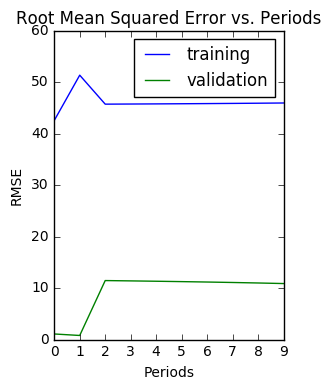

In [51]:
dnn_regressor = train_nn_regression_model(
    my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.08),
    steps=500,
    batch_size=70,
    hidden_units=[10, 10],
    training_features=price_tweet_df_training_features,
    training_targets=price_tweet_df_training_targets,
    validation_features=validation_features,
    validation_targets=validation_targets)

In [43]:
training_output

(<tensorflow.python.estimator.canned.dnn.DNNRegressor at 0x291e20e4390>,
 [31.890361772176316,
  51.513298620775274,
  46.09574112409489,
  46.13560031366132,
  46.18086655336208,
  46.23333538348145,
  46.29586169651055,
  46.3734020827969,
  46.475590185463716,
  47.28823419546613],
 [1.4406206034842506,
  0.9297257792107515,
  10.478068084508946,
  10.37904095776302,
  10.26712146775584,
  10.138101026027792,
  9.985320777419098,
  9.797286452226677,
  9.551832022021376,
  7.684882691858284])

## Normalize Features Using Linear Scaling

In [53]:
def linear_scale(series):
    min_val = series.min()
    max_val = series.max()
    scale = (max_val - min_val) / 2.0
    return series.apply(lambda x:((x - min_val) / scale) - 1.0)

Training model...
RMSE (on training data):
  period 00 : 47.56
  period 01 : 47.56
  period 02 : 47.56
  period 03 : 47.56
  period 04 : 47.56
  period 05 : 47.56
  period 06 : 47.56
  period 07 : 47.56
  period 08 : 47.56
  period 09 : 47.56
Model training finished.
Final RMSE (on training data): 47.56
Final RMSE (on validation data): 7.11


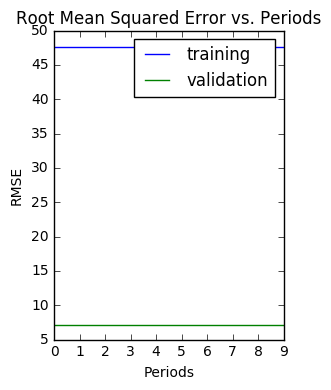

In [54]:
def normalize_linear_scale(features_dataframe):
    """Returns a version of the input `DataFrame` that has all its features normalized linearly."""
    processed_features = pd.DataFrame()
    processed_features["pos_tweet_textBlob"] = linear_scale(features_dataframe["pos_tweet_textBlob"])
    return processed_features

normalized_dataframe = normalize_linear_scale(preprocess_features(train_df))
normalized_training_features = normalized_dataframe.head(600)
normalized_validation_features = normalized_dataframe.tail(200)

dnn_regressor = train_nn_regression_model(
    my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1),
    steps=500,
    batch_size=70,
    hidden_units=[10, 1],
    training_features=price_tweet_df_training_features,
    training_targets=price_tweet_df_training_targets,
    validation_features=normalized_validation_features,
    validation_targets=validation_targets)

## Evaluate on Test Data

In [57]:
test_df = price_tweet_df[800:]

test_features = preprocess_features(test_df)
test_targets = preprocess_targets(test_df)

predict_testing_input_fn = lambda: my_input_fn(test_features, 
                                               test_targets["Close"], 
                                               num_epochs=1, 
                                               shuffle=False)

test_predictions = dnn_regressor.predict(input_fn=predict_testing_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt(metrics.mean_squared_error(test_predictions, test_targets))

print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)

Final RMSE (on test data): 61.90
